In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
column_names = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
efficiency = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df = pd.DataFrame(efficiency, columns=column_names)
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


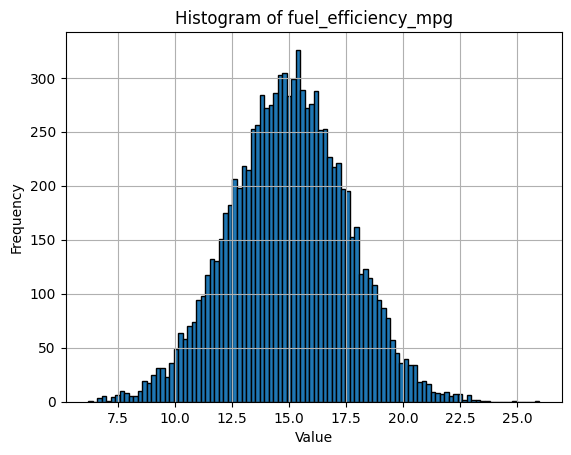

In [3]:
df.hist(column='fuel_efficiency_mpg', bins=100, edgecolor='black')
plt.title('Histogram of fuel_efficiency_mpg')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

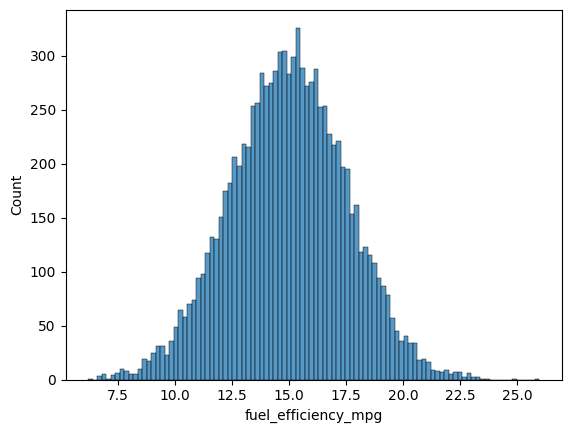

In [4]:
sns.histplot(df.fuel_efficiency_mpg, bins=100, edgecolor='black')

In [5]:
df.isnull().any(axis=0).sum

<bound method Series.sum of engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool>

In [6]:
df['horsepower'].median()

np.float64(149.0)

In [7]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(1940, 1940, 5824)

In [8]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [9]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]


len(df_val), len(df_test), len(df_train)

(1940, 1940, 5824)

Fill with 0

In [10]:
df_filled = df.fillna(0)
df_filled

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,0.0,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


Fill with mean

In [13]:
mean_of_horsepower = df['horsepower'].mean()
mean_of_horsepower
df_filled_with_mean = df.fillna(mean_of_horsepower)
df_filled_with_mean

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.000000,3413.433759,2003,13.231729
1,130,97.000000,3149.664934,2007,13.688217
2,170,78.000000,3079.038997,2018,14.246341
3,220,149.657292,2542.392402,2009,16.912736
4,210,140.000000,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.000000,2981.107371,2013,15.101802
9700,180,154.000000,2439.525729,2004,17.962326
9701,220,138.000000,2583.471318,2008,17.186587
9702,230,177.000000,2905.527390,2011,15.331551
